In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:\\Users\\USER\\Downloads\\crop_production.csv')
df.head(5)

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,0,AUS,CROPYIELD,RICE,TONNE_HA,A,1990,8.314607,NaN
1,1,AUS,CROPYIELD,RICE,TONNE_HA,A,1991,8.394737,NaN
2,2,AUS,CROPYIELD,RICE,TONNE_HA,A,1992,8.094340,NaN
3,3,AUS,CROPYIELD,RICE,TONNE_HA,A,1993,8.336000,NaN
4,4,AUS,CROPYIELD,RICE,TONNE_HA,A,1994,8.537815,NaN


In [4]:
df = df[['LOCATION','INDICATOR','SUBJECT','MEASURE','FREQUENCY','TIME','Value']]

In [5]:
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,AUS,CROPYIELD,RICE,TONNE_HA,A,1990,8.314607
1,AUS,CROPYIELD,RICE,TONNE_HA,A,1991,8.394737
2,AUS,CROPYIELD,RICE,TONNE_HA,A,1992,8.094340
3,AUS,CROPYIELD,RICE,TONNE_HA,A,1993,8.336000
4,AUS,CROPYIELD,RICE,TONNE_HA,A,1994,8.537815


In [6]:
df=df.rename(columns ={'LOCATION':'location','INDICATOR':'indicator','SUBJECT':'crop_type','MEASURE':'measure','FREQUENCY':'frequency','TIME':'time','Value':'value'})

In [7]:
df.describe()

,time,value
count,20566.000000,2.056600e+04
mean,2007.591170,1.249281e+04
std,10.369489,5.960529e+04
min,1970.000000,0.000000e+00
25%,1999.000000,1.961877e+00
50%,2008.000000,2.560970e+01
75%,2017.000000,1.563000e+03
max,2025.000000,1.146044e+06


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20566 entries, 0 to 20565
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   20566 non-null  object 
 1   indicator  20566 non-null  object 
 2   crop_type  20566 non-null  object 
 3   measure    20566 non-null  object 
 4   frequency  20566 non-null  object 
 5   time       20566 non-null  int64  
 6   value      20566 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


In [26]:
df.isnull().sum()

location     0
indicator    0
crop_type    0
measure      0
frequency    0
time         0
value        0
dtype: int64

In [8]:
df['location'].unique()

array(['AUS', 'CAN', 'JPN', 'KOR', 'MEX', 'NZL', 'TUR', 'USA', 'DZA',
       'ARG', 'BGD', 'BRA', 'CHL', 'CHN', 'COL', 'EGY', 'ETH', 'GHA',
       'IND', 'IDN', 'IRN', 'KAZ', 'MYS', 'MOZ', 'NGA', 'PAK', 'PRY',
       'PER', 'PHL', 'RUS', 'SAU', 'ZAF', 'SDN', 'TZA', 'THA', 'UKR',
       'URY', 'VNM', 'ZMB', 'WLD', 'SSA', 'OECD', 'BRICS', 'NOR', 'CHE',
       'EU28', 'ISR', 'HTI'], dtype=object)

In [27]:
df.nunique()

location        48
indicator        1
crop_type        4
measure          3
frequency        1
time            56
value        16262
dtype: int64

<AxesSubplot:ylabel='crop_type'>

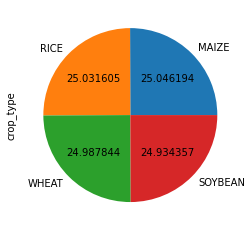

In [9]:
df['crop_type'].value_counts().plot(kind='pie',autopct='%2f')


<AxesSubplot:ylabel='measure'>

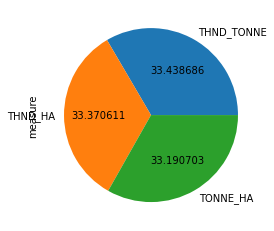

In [10]:
df['measure'].value_counts().plot(kind='pie',autopct='%2f')

In [13]:
df.columns

Index(['location', 'indicator', 'crop_type', 'measure', 'frequency', 'time',
       'value'],
      dtype='object')

[]

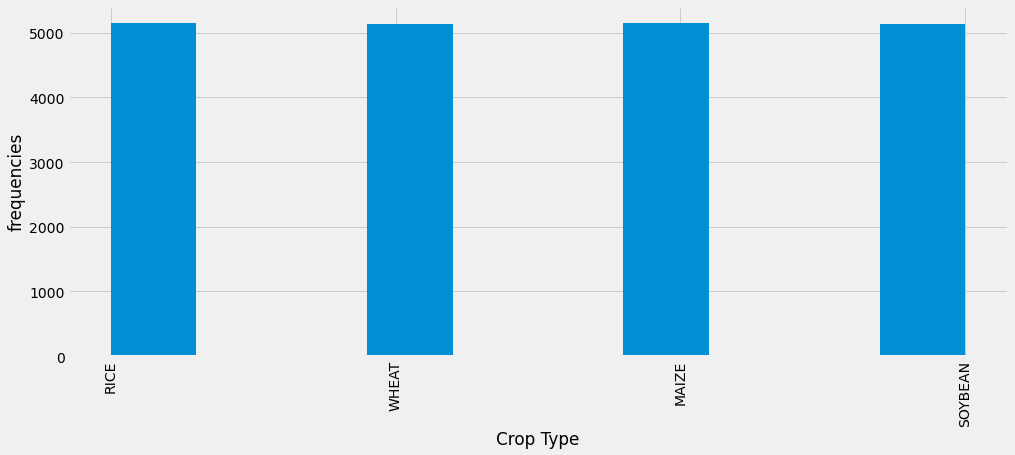

In [16]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.crop_type.hist()
plt.xlabel('Crop Type')
plt.ylabel('frequencies')
plt.plot()

In [18]:
import seaborn as sns

<AxesSubplot:xlabel='value', ylabel='time'>

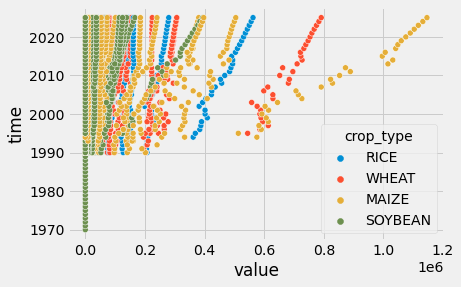

In [20]:
sns.scatterplot(df['value'],df['time'],hue=df['crop_type'])

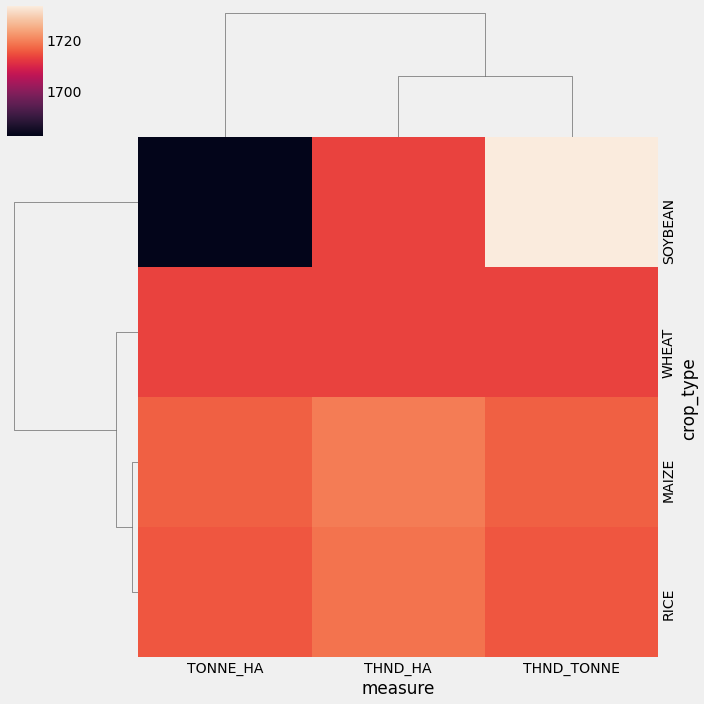

In [22]:
sns.clustermap(pd.crosstab(df['crop_type'],df['measure']))

<AxesSubplot:title={'center':'crop cost'}, xlabel='value', ylabel='crop_type'>

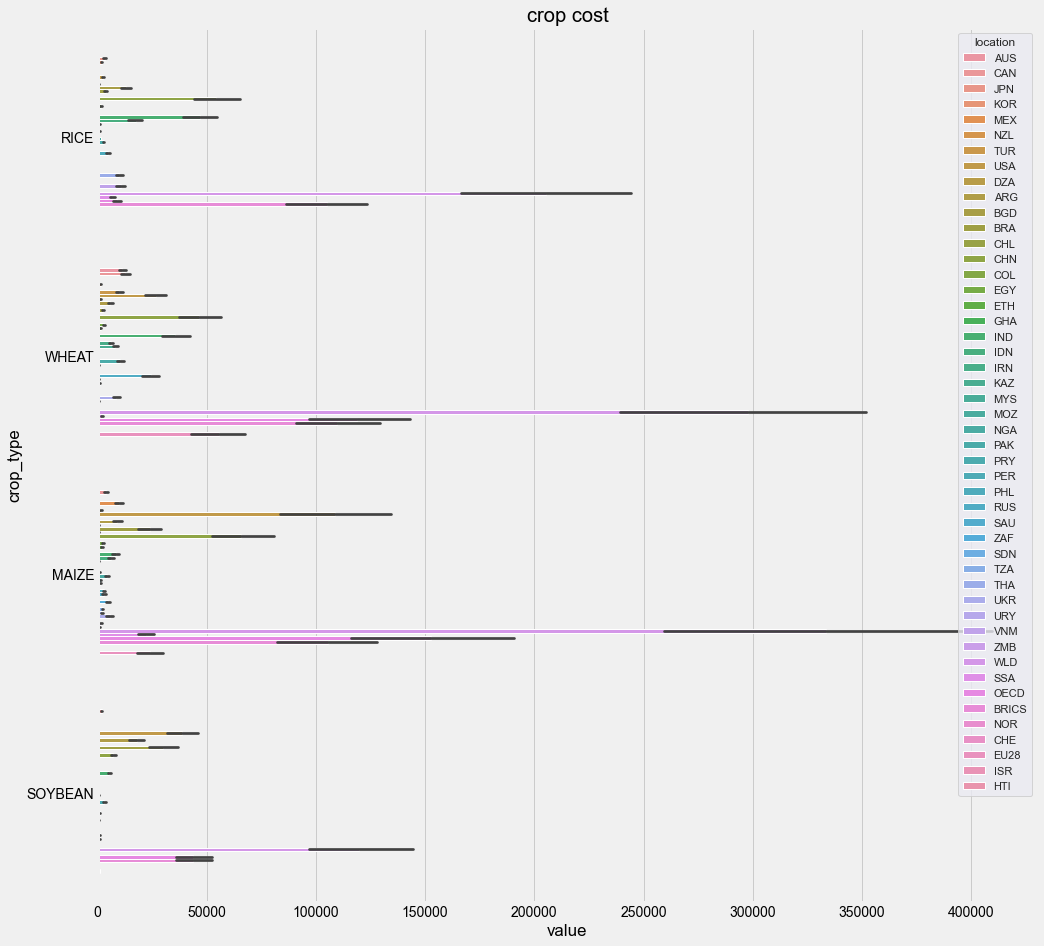

In [23]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,15))
plt.title("crop cost")
sns.set(font_scale=1)
sns.barplot(data=df, x="value", y="crop_type",hue="location")

<AxesSubplot:title={'center':'Crop measure'}, xlabel='value', ylabel='crop_type'>

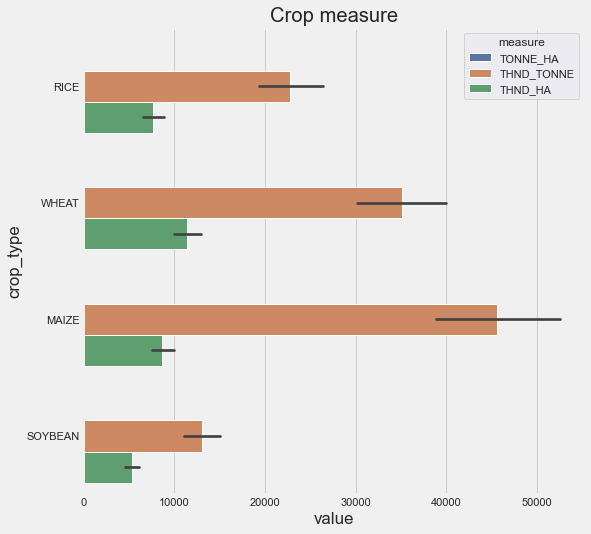

In [24]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))
plt.title("Crop measure")
sns.set(font_scale=1)
sns.barplot(data=df, x="value", y="crop_type",hue="measure")

<AxesSubplot:>

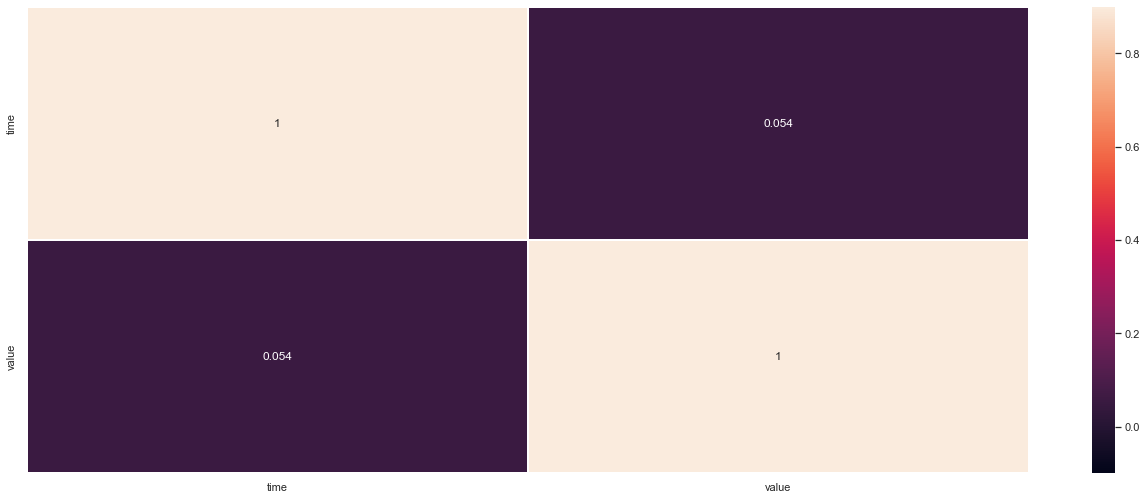

In [28]:
corrmatrix=df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.1,vmax=0.9,annot=True,linewidth=0.2)